In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
plt.rcParams["figure.figsize"] = (15,10)

def plot_graph(name, dfrom, dto, saveas, filteratpos, filteratneg, key, every=""):
    df = pd.read_csv(f"./progressive/{name}.csv", 
                        index_col=0,
                        parse_dates=['Time'],
                )
    
    df.columns = df.columns.str.replace('Value #', '')
    if dfrom != "":
        df = df.loc[(df.index >= dfrom)]
    if dto != "":
        df = df.loc[(df.index <= dto)]
    df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]
    
    def plot_corr(corr_df, corr_name):
        corr_df = corr_df.loc[((corr_df[key] > filteratpos) | (corr_df[key] < filteratneg)), ((corr_df[key] > filteratpos) | (corr_df[key] < filteratneg))]
        sb.heatmap(corr_df, cmap="Greens", annot=True)
        plt.xticks(rotation = 45)
        plt.title(f"{name}")
        plt.savefig(f"{corr_name}.png")
        
    
    
    corr = df.corr()
    plot_corr(corr, saveas)
    return
    
    
    
def plot_columns(name, dfrom, dto, saveas, columns):
        df = pd.read_csv(f"./progressive/{name}.csv", 
                        index_col=0,
                        parse_dates=['Time'],
                )
        df.columns = df.columns.str.replace('Value #', '')
        if dfrom != "":
            df = df.loc[(df.index >= dfrom)]
        if dto != "":
            df = df.loc[(df.index <= dto)]
        df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]
        print(df.columns)
        df = df.groupby('instance')
        
        figure, axis = plt.subplots(len(columns), 1)
        for i in range(len(columns)):
            for instance in df.groups:
                df_instance = df.get_group(instance)
                x = df_instance.index
                y = df_instance[(columns[i])]
                axis[i].plot(x, y, label=instance)
                axis[i].set_title(columns[i], x=0.1, y=.85, fontweight='bold')
        #plt.title(saveas, loc="center")
        plt.savefig(f"{saveas}.png")

        

/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/1667652842.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


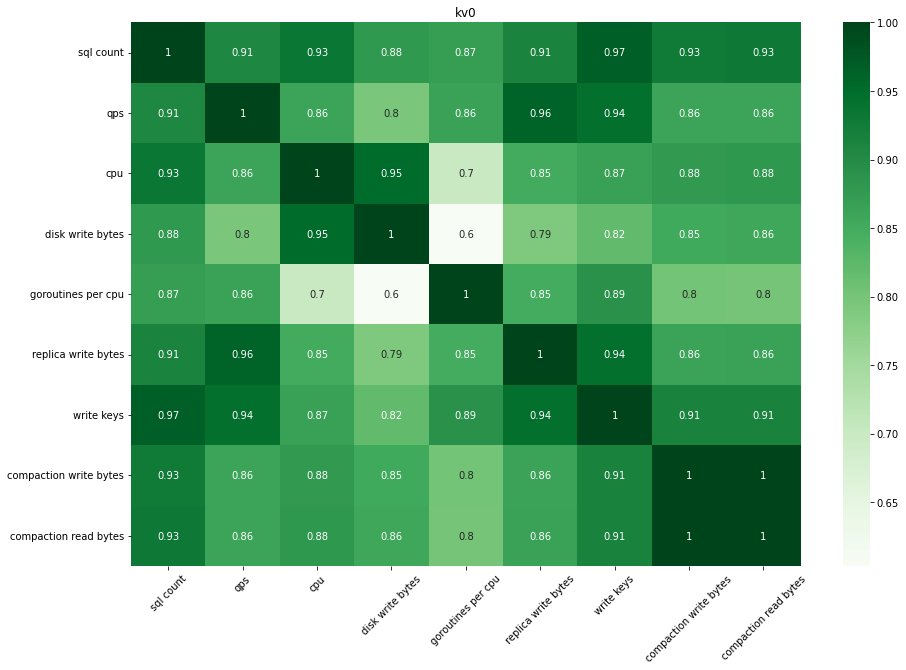

In [67]:
plot_graph("kv0", "", "2022-08-30 19:24:00", "kv0-balance", 0.85, -2, "sql count")



/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/7105779.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


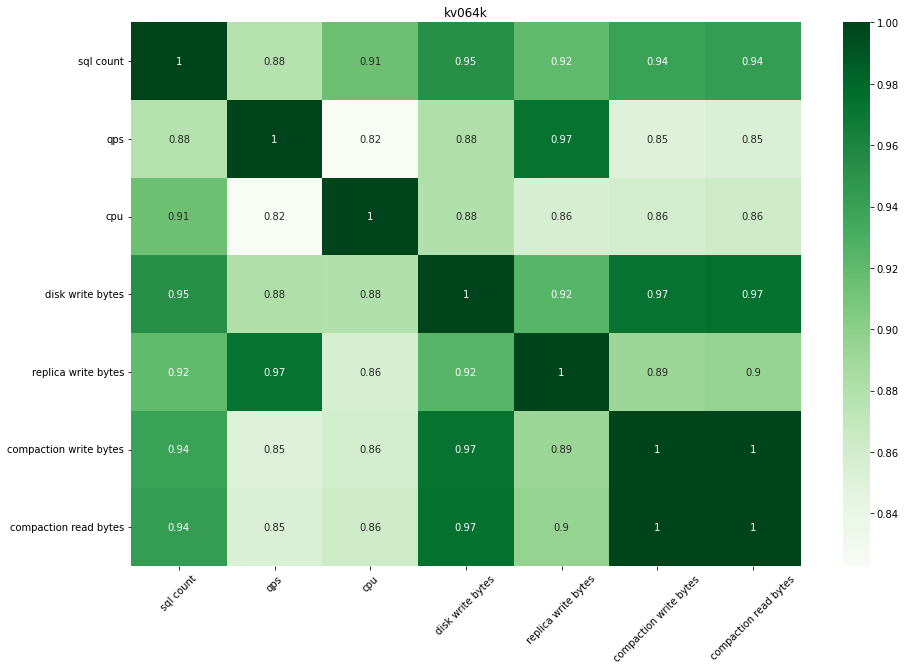

In [3]:
plot_graph("kv064k", "", "2022-08-30 19:24:00", "kv064k-balance", 0.85, -2, "sql count")


/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/7105779.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


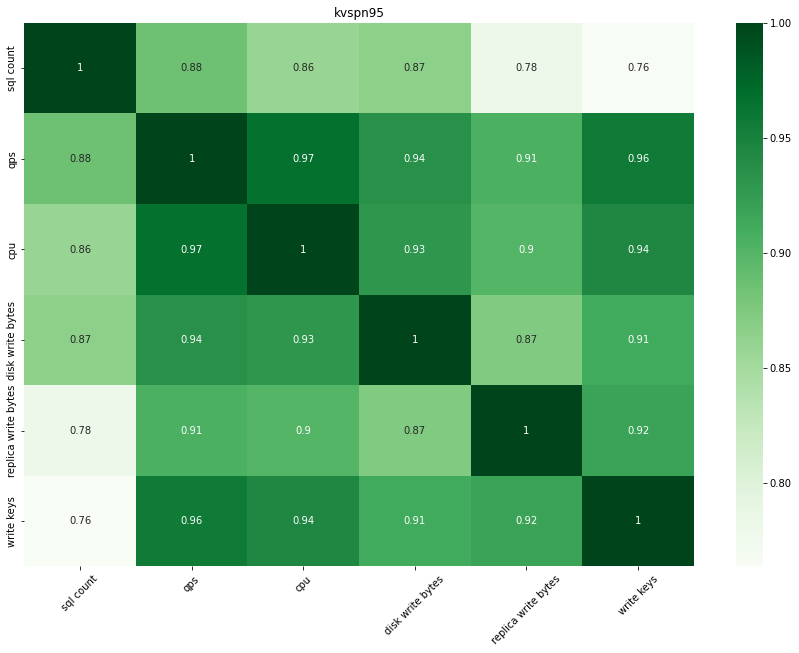

In [4]:
plot_graph("kvspn95", "", "2022-08-30 19:20:30", "kvspan95-balance", 0.69, -2, "sql count")


/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/7105779.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


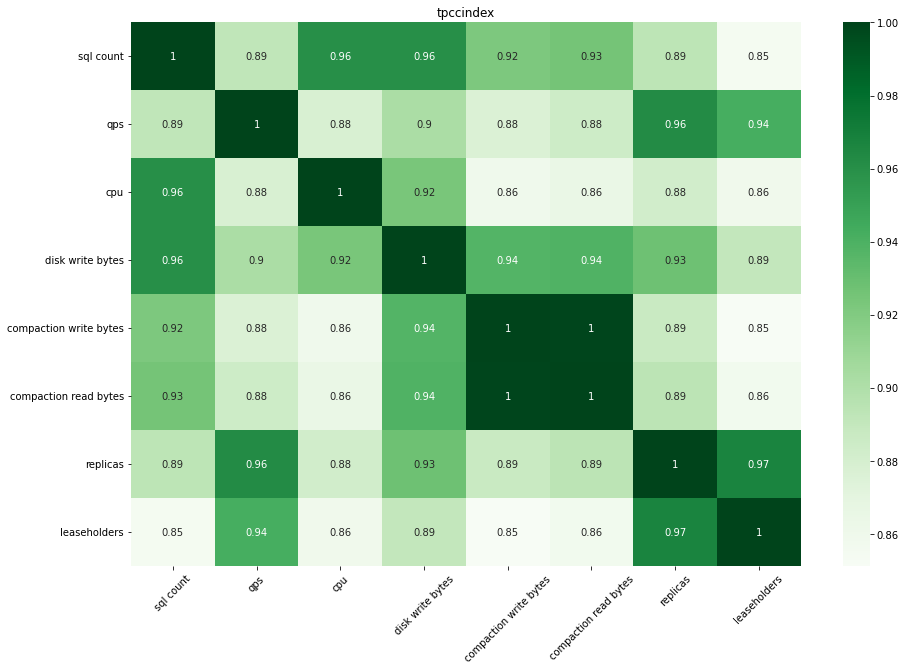

In [5]:
plot_graph("tpccindex", "", "2022-08-30 19:52:30", "tpccindex-balance", 0.80, -2, "sql count")


/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/1667652842.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


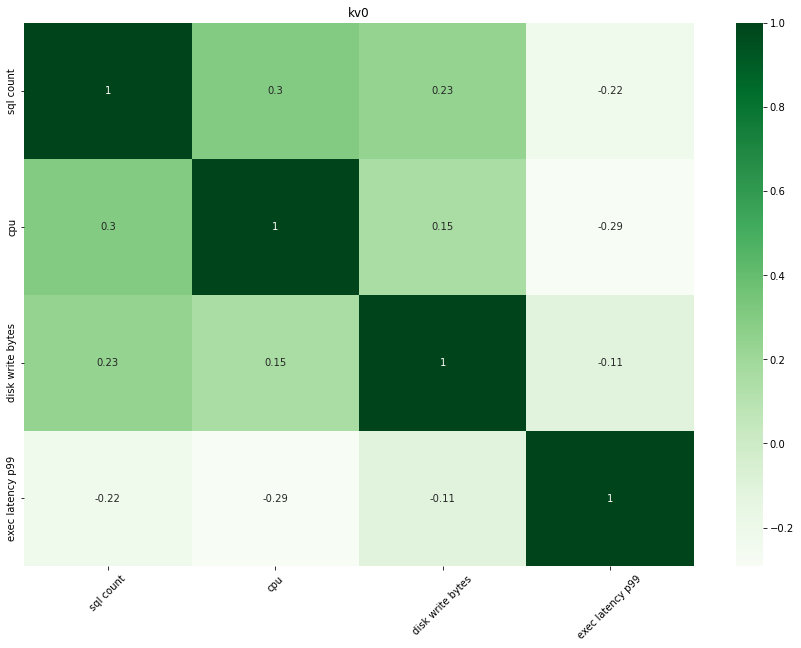

In [56]:
plot_graph("kv0", "2022-08-30 19:24:00", "2022-08-30 21:15:00", "kv0-overload", 0.4, -0.1, "exec latency p99")

/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/1667652842.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


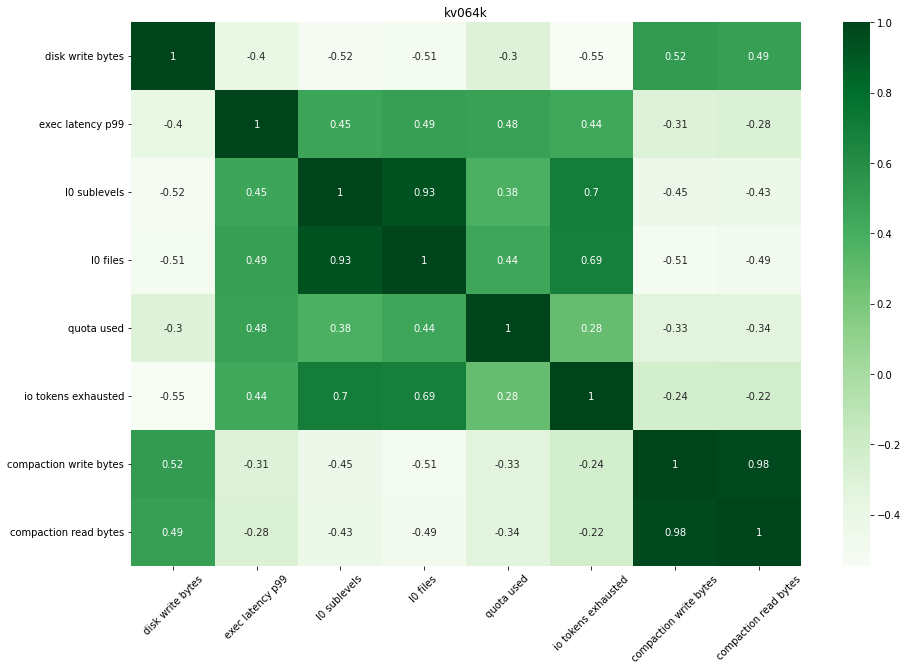

In [54]:
plot_graph("kv064k", "2022-08-30 19:24:00", "2022-08-30 21:15:00", "kv064k-overload", 0.4, -0.1, "exec latency p99")
    

/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/1667652842.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


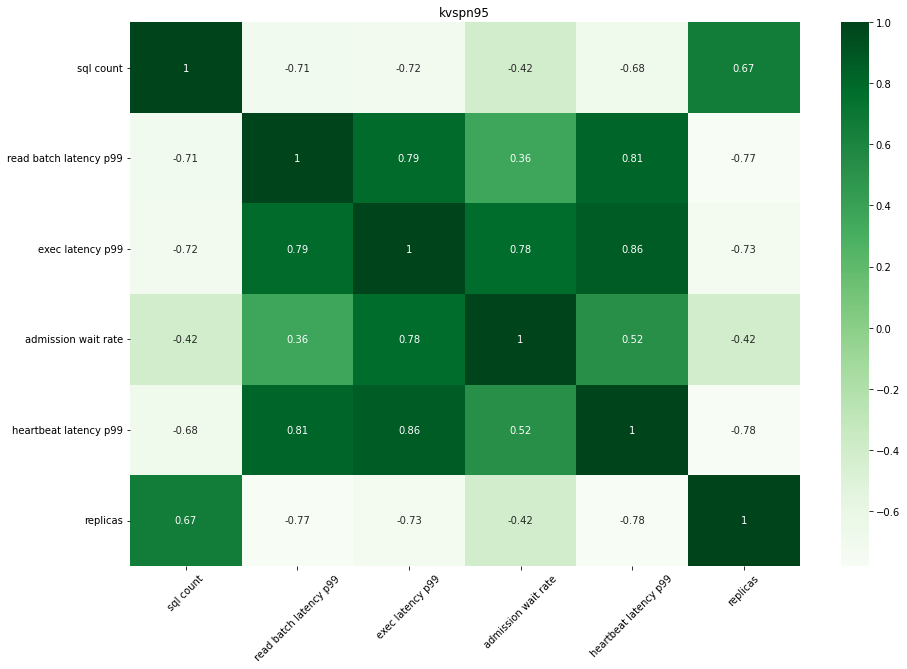

In [66]:
plot_graph("kvspn95", "2022-08-30 19:20:30", "2022-08-30 20:20:00", "kvspan95-overload", 0.75, -0.7, "exec latency p99")


/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/1667652842.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


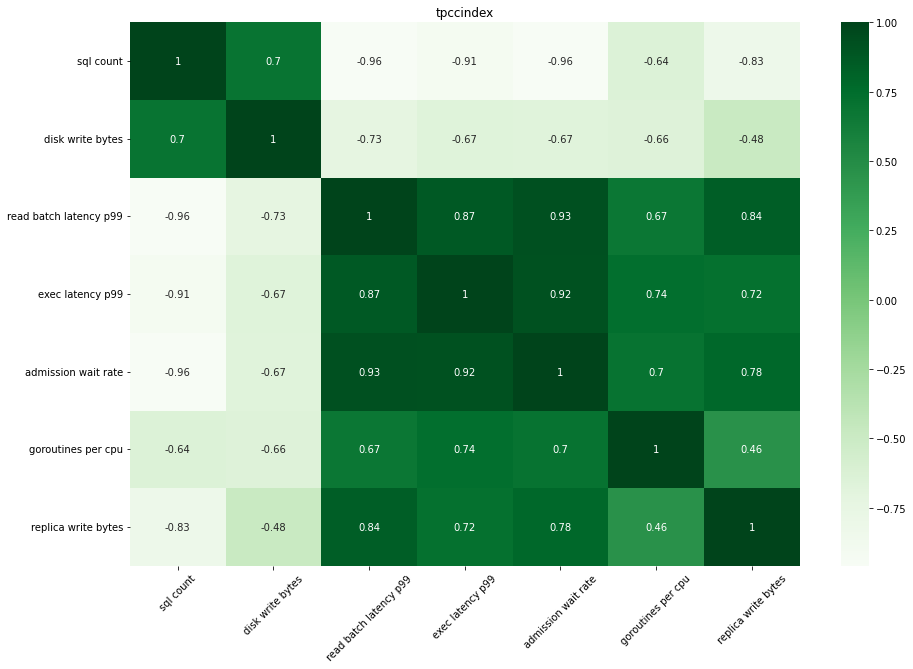

In [64]:
plot_graph("tpccindex", "2022-08-30 19:52:30", "2022-08-30 21:50:00", "tpccindex-overload", 0.7, -0.6, "exec latency p99")


/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/2299646107.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


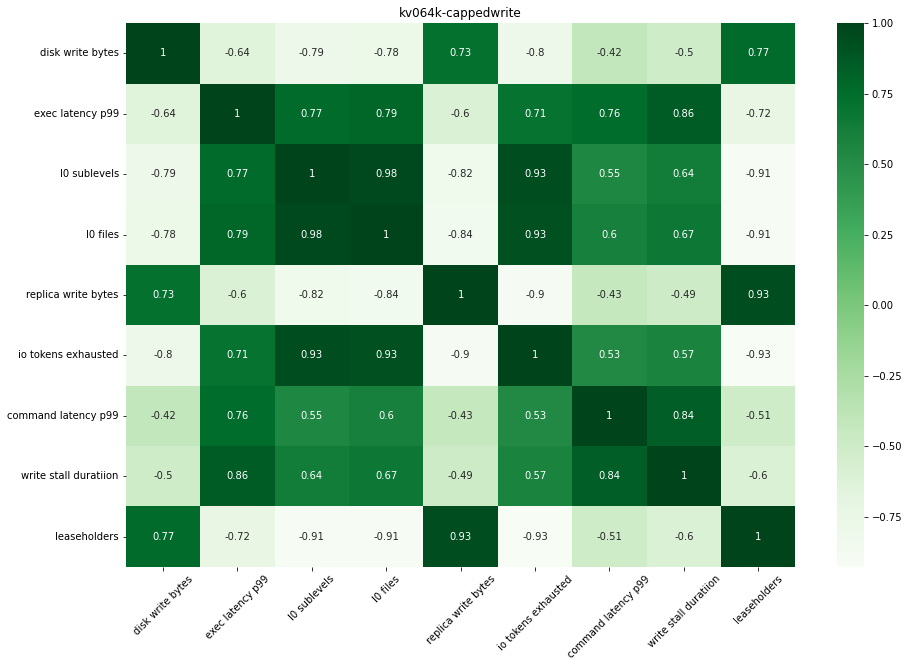

In [91]:
plot_graph("kv064k-cappedwrite", "2022-08-30 19:13:30", "2022-08-30 21:30:00", "kv064k-cappedwrite-overload", 0.7, -0.6, "exec latency p99", "34.73.90.56:26258")


/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/2299646107.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


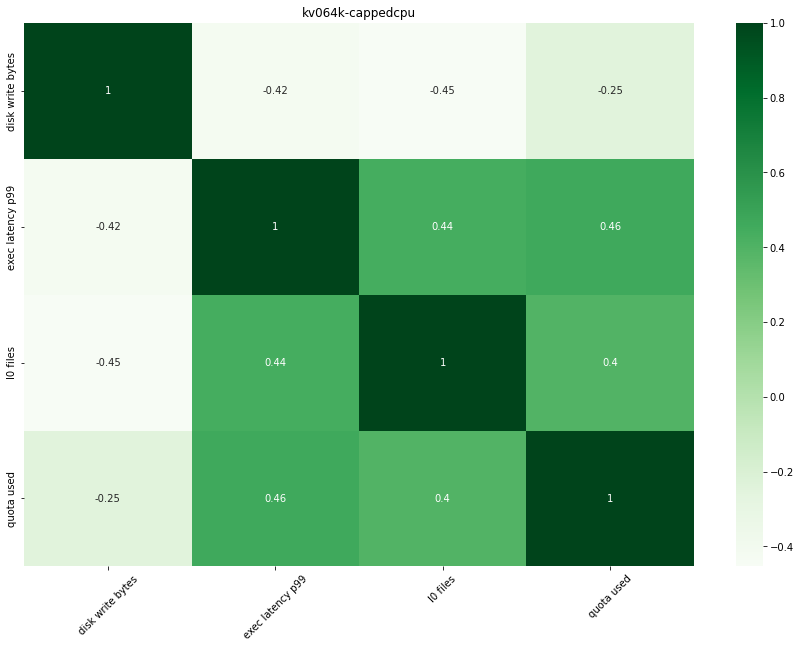

In [90]:
plot_graph("kv064k-cappedcpu", "2022-08-30 19:30:00", "2022-08-30 21:15:00", "kv064k-cappedcpu-overload", 0.4, -0.3, "exec latency p99", "34.148.5.250:26258")


/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/2299646107.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


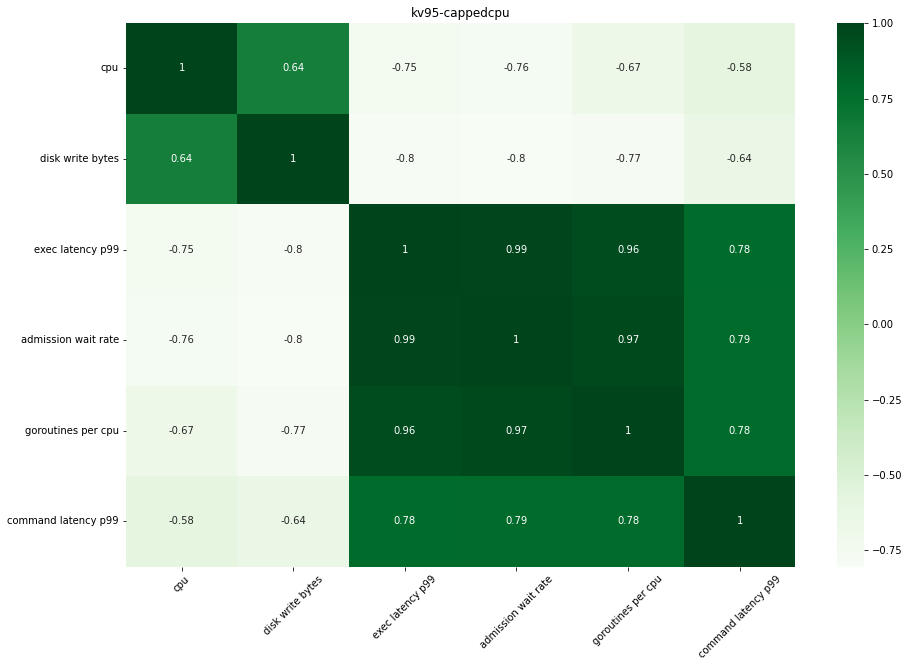

In [92]:
plot_graph("kv95-cappedcpu", "2022-08-30 19:25:00", "2022-08-30 21:15:00", "kv95-cappedcpu-overload", 0.7, -0.6, "exec latency p99", "34.75.35.237:26258")


/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/3497230413.py:45: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


Index(['instance', 'sql count', 'qps', 'iops in progress', 'cpu',
       'disk write bytes', 'read batch latency p99', 'exec latency p99',
       'admission wait queue length', 'admission wait rate',
       'goroutines per cpu', 'l0 sublevels', 'l0 files', 'quota used',
       'disk read bytes', 'replica read bytes', 'replica write bytes',
       'read keys', 'write keys', 'io tokens exhausted',
       'heartbeat latency p99', 'kv used slots / total', 'command latency p99',
       'compaction write bytes', 'compaction read bytes',
       'write stall duratiion', 'replicas', 'leaseholders'],
      dtype='object')


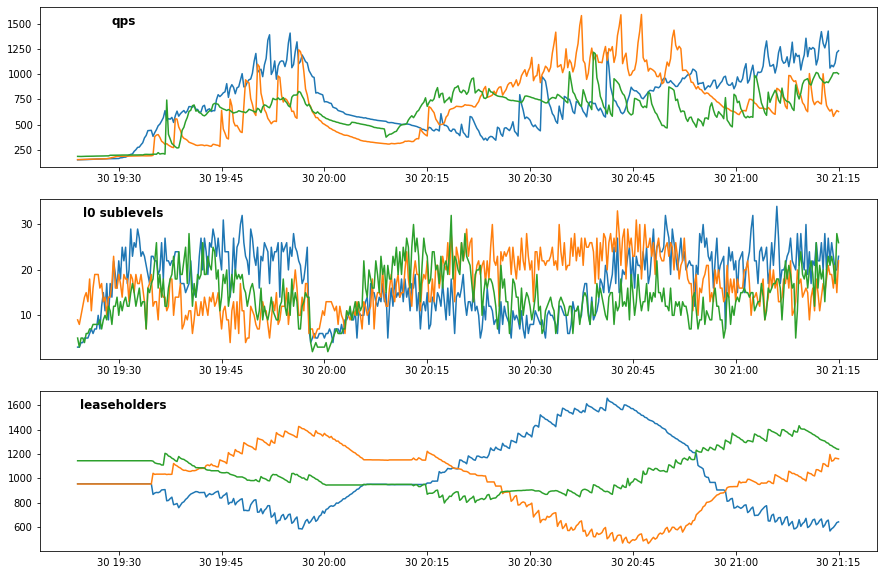

In [137]:
plot_columns("kv064k","2022-08-30 19:24:00", "2022-08-30 21:15:00", "kv064k-imbalance", ["qps", "l0 sublevels", "leaseholders"])


/var/folders/rj/bmt5w6l91r76lmjjbycd9nmm0000gq/T/ipykernel_808/3497230413.py:45: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]


Index(['instance', 'sql count', 'qps', 'iops in progress', 'cpu',
       'disk write bytes', 'read batch latency p99', 'exec latency p99',
       'admission wait queue length', 'admission wait rate',
       'goroutines per cpu', 'l0 sublevels', 'l0 files', 'quota used',
       'disk read bytes', 'replica read bytes', 'replica write bytes',
       'read keys', 'write keys', 'io tokens exhausted',
       'heartbeat latency p99', 'kv used slots / total', 'command latency p99',
       'compaction write bytes', 'compaction read bytes',
       'write stall duratiion', 'replicas', 'leaseholders'],
      dtype='object')


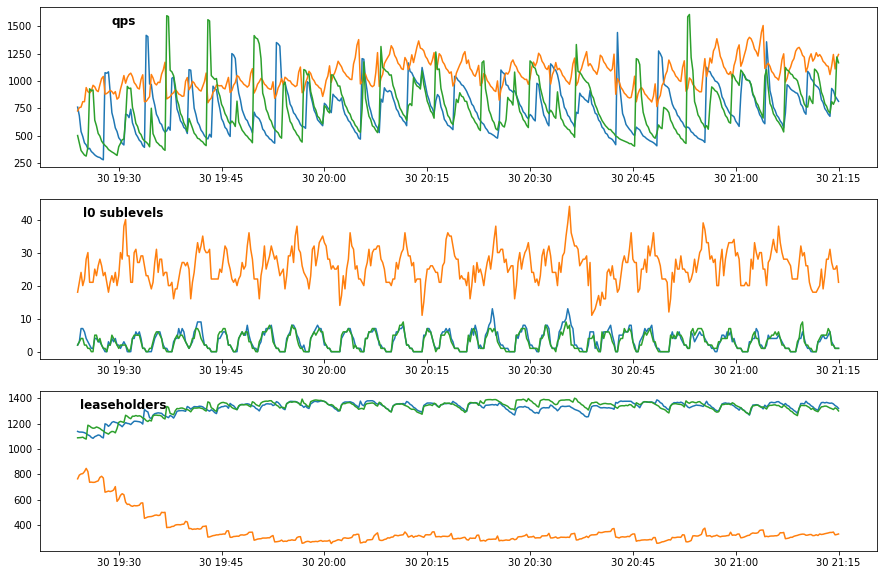

In [138]:
plot_columns("kv064k-cappedwrite","2022-08-30 19:24:00", "2022-08-30 21:15:00", "kv064k-cappedwrite-imbalance", ["qps", "l0 sublevels", "leaseholders"])
